In [1]:
import pandas as pd
import requests

## Hello World

In [2]:
requests.get("https://api.chess.com/pub/player/uneatenbean/stats").json()

{'chess_daily': {'last': {'rating': 831, 'date': 1657183205, 'rd': 163},
  'best': {'rating': 831,
   'date': 1657183205,
   'game': 'https://www.chess.com/game/daily/377756365'},
  'record': {'win': 6,
   'loss': 0,
   'draw': 0,
   'time_per_move': 12221,
   'timeout_percent': 0}},
 'chess_rapid': {'last': {'rating': 1282, 'date': 1656591197, 'rd': 51},
  'best': {'rating': 1360,
   'date': 1651775655,
   'game': 'https://www.chess.com/game/live/44785791809'},
  'record': {'win': 188, 'loss': 103, 'draw': 7}},
 'chess_bullet': {'last': {'rating': 1303, 'date': 1657410145, 'rd': 30},
  'best': {'rating': 1303,
   'date': 1657410145,
   'game': 'https://www.chess.com/game/live/50595572023'},
  'record': {'win': 426, 'loss': 317, 'draw': 9}},
 'chess_blitz': {'last': {'rating': 1101, 'date': 1657410621, 'rd': 42},
  'best': {'rating': 1180,
   'date': 1649669695,
   'game': 'https://www.chess.com/game/live/43407601701'},
  'record': {'win': 473, 'loss': 363, 'draw': 30}},
 'fide': 0,
 '

## Games

In [22]:
from chess import pgn
import io

In [23]:
games_res = requests.get("https://api.chess.com/pub/player/uneatenbean/games/2022/06/pgn").text

parsed_games = []
for i in range(8):
    games_res = requests.get(f"https://api.chess.com/pub/player/uneatenbean/games/2022/0{i}/pgn").text
    [parsed_games.append(pgn.read_game(io.StringIO(g))) for g in games_res.split("\n\n\n")]

In [24]:
len(parsed_games)

1230

In [25]:
game = pgn.read_game(io.StringIO(games_res))

In [26]:
game.headers

Headers(Event='Live Chess', Site='Chess.com', Date='2022.07.03', Round='-', White='uneatenbean', Black='shuweii', Result='0-1', BlackElo='1026', CurrentPosition='r4rk1/6p1/8/p3p3/1pNpP3/1P1P4/P1N2pq1/2RQK2R w - -', ECO='A08', ECOUrl='https://www.chess.com/openings/Kings-Indian-Attack-French-Variation', EndDate='2022.07.03', EndTime='22:19:58', Link='https://www.chess.com/game/live/50624980741', StartTime='22:07:22', Termination='shuweii won by resignation', TimeControl='300+5', Timezone='UTC', UTCDate='2022.07.03', UTCTime='22:07:22', WhiteElo='1109')

**TimeControl** is in seconds, I will have to filter time control for common Rapid values

**BlackElo; WhiteElo**: I can get the elo at the start of every game, which should be a sufficient marker

### Multiple games

In [27]:
games_list = games_res.split("\n\n\n")
len(games_list)
#parsed_games = [pgn.read_game(io.StringIO(g)) for g in games_list]

21

In [28]:
#[pgn.read_game(io.StringIO(g)).headers["TimeControl"] for g in games_list]

### TimeControl

In [29]:
import re

In [30]:
def isRapid(time_control: str) -> bool:
    match = re.match("\d+", time_control)
    if not match: raise "Invalid Time Control"
    return int(match.group(0)) >= 600

assert isRapid("600")
assert not isRapid("100")

def isLive(event: str) -> bool:
    return event == "Live Chess"

In [35]:
def clean_games(games):
    return list(filter(lambda g: "TimeControl" in g.headers.keys(), games))

In [36]:
list(filter(lambda g: "TimeControl" not in g.headers.keys(), parsed_games))
parsed_games = clean_games(parsed_games)

In [37]:
rapid_games = list(filter(lambda g: isRapid(g.headers["TimeControl"]) and isLive(g.headers["Event"]), parsed_games))

In [38]:
print(len(rapid_games))
[print(g.headers["White"], " - ", g.headers["Black"], " @ ", g.headers["Date"]) for g in rapid_games]

120
uneatenbean  -  larshill  @  2022.01.15
uneatenbean  -  Gralicoma  @  2022.01.15
uneatenbean  -  MohamedEL-Daly  @  2022.01.05
BenjaminMeaby  -  uneatenbean  @  2022.01.05
uneatenbean  -  Rajatzzz  @  2022.01.05
deronchessgod  -  uneatenbean  @  2022.02.20
uneatenbean  -  BourbonBrett  @  2022.02.20
Renzo48  -  uneatenbean  @  2022.02.18
uneatenbean  -  fishpickle123  @  2022.02.18
uneatenbean  -  SaeedAwad  @  2022.02.16
gustavo3986  -  uneatenbean  @  2022.02.16
uneatenbean  -  taco_zip  @  2022.02.16
franklyMe42  -  uneatenbean  @  2022.02.16
uneatenbean  -  Winckler18  @  2022.02.11
ChessConesour  -  uneatenbean  @  2022.02.11
uneatenbean  -  bjam224  @  2022.02.11
SKenyon20  -  uneatenbean  @  2022.02.11
uneatenbean  -  benp317  @  2022.02.11
kravovar  -  uneatenbean  @  2022.02.11
Primus56  -  uneatenbean  @  2022.02.11
uneatenbean  -  FilDyn76  @  2022.02.11
uneatenbean  -  Varun416  @  2022.02.09
glardwin  -  uneatenbean  @  2022.02.09
uneatenbean  -  glardwin  @  2022.02.0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Graphs
First, I want rating over time

In [39]:
import matplotlib.pyplot as plt

In [40]:
USERNAME = "uneatenbean"

In [41]:
rapid_games[0].headers

Headers(Event='Live Chess', Site='Chess.com', Date='2022.01.15', Round='-', White='uneatenbean', Black='larshill', Result='1-0', BlackElo='1069', CurrentPosition='r3r3/2Q5/pk2ppp1/1p6/8/2R5/1P3PPP/6K1 b - -', ECO='D00', ECOUrl='https://www.chess.com/openings/Queens-Pawn-Opening-Accelerated-London-System', EndDate='2022.01.15', EndTime='17:58:25', Link='https://www.chess.com/game/live/36007729553', StartTime='17:43:55', Termination='uneatenbean won by checkmate', TimeControl='600', Timezone='UTC', UTCDate='2022.01.15', UTCTime='17:43:55', WhiteElo='1038')

In [42]:
ratings = [g.headers["WhiteElo"] if g.headers["White"] == USERNAME else g.headers["BlackElo"] for g in rapid_games]

In [43]:
ratings

['1038',
 '1029',
 '1039',
 '1047',
 '1052',
 '1188',
 '1179',
 '1171',
 '1164',
 '1155',
 '1147',
 '1139',
 '1132',
 '1125',
 '1117',
 '1108',
 '1100',
 '1091',
 '1098',
 '1089',
 '1081',
 '1072',
 '1063',
 '1063',
 '1062',
 '1052',
 '1044',
 '1036',
 '1045',
 '1038',
 '1046',
 '1037',
 '1037',
 '1045',
 '1296',
 '1303',
 '1294',
 '1287',
 '1298',
 '1298',
 '1306',
 '1298',
 '1290',
 '1283',
 '1274',
 '1267',
 '1261',
 '1253',
 '1261',
 '1269',
 '1261',
 '1254',
 '1246',
 '1254',
 '1246',
 '1238',
 '1230',
 '1238',
 '1238',
 '1230',
 '1238',
 '1229',
 '1221',
 '1210',
 '1204',
 '1204',
 '1195',
 '1204',
 '1212',
 '1204',
 '1197',
 '1188',
 '1179',
 '1171',
 '1179',
 '1352',
 '1345',
 '1336',
 '1344',
 '1337',
 '1329',
 '1321',
 '1329',
 '1321',
 '1313',
 '1304',
 '1313',
 '1305',
 '1305',
 '1321',
 '1321',
 '1321',
 '1329',
 '1321',
 '1313',
 '1321',
 '1330',
 '1338',
 '1346',
 '1353',
 '1360',
 '1352',
 '1359',
 '1282',
 '1291',
 '1298',
 '1306',
 '1314',
 '1325',
 '1319',
 '1330',
 

### Date
Date is in YYYY.MM.DD format, I will read into a date property after converting to epoch then average rating per day in Pandas Dataframe

In [72]:
from datetime import datetime, timedelta
import pytz

In [65]:
player_joined = requests.get("https://api.chess.com/pub/player/uneatenbean").json()["joined"]
date_joined = datetime.fromtimestamp(player_joined)

In [68]:
date_joined.month

4

In [45]:
def parse_date(date: str) -> int:
    return datetime.strptime(date, "%Y.%m.%d").replace(tzinfo=pytz.UTC).timestamp()

assert parse_date('2022.06.30') == 1656547200.0

In [46]:
rating_times = [[int(g.headers["WhiteElo"] if g.headers["White"] == USERNAME else g.headers["BlackElo"]), parse_date(g.headers["UTCDate"])] for g in rapid_games]
rating_times[0]

[1038, 1642204800.0]

In [50]:
df = pd.DataFrame(rating_times, columns=["Rating", "Date"])
df.describe()

,Rating,Date
count,120.000000,1.200000e+02
mean,1228.591667,1.648683e+09
std,102.402608,4.017484e+06
min,1029.000000,1.641341e+09
25%,1161.750000,1.645099e+09
50%,1261.000000,1.648253e+09
75%,1313.000000,1.651709e+09
max,1360.000000,1.656547e+09


In [48]:
df.groupby(['Date']).mean()

,Ratings
Date,
1.641341e+09,1046.000000
1.642205e+09,1033.500000
1.643846e+09,1040.600000
1.643933e+09,1040.500000
1.644365e+09,1059.333333
1.644538e+09,1101.125000
1.644970e+09,1143.250000
1.645142e+09,1167.500000
1.645315e+09,1183.500000


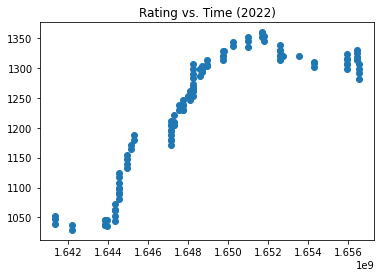

In [58]:
fig, ax = plt.subplots()

ax.scatter(df["Date"], df["Rating"])
plt.title("Rating vs. Time (2022)")
plt.show()

In [74]:
player_joined = requests.get(f"https://api.chess.com/pub/player/uneatenbean").json()["joined"]
date_joined = datetime.fromtimestamp(player_joined)
month = date_joined.month
year = date_joined.year

now = datetime.now()

parsed_games = []
while datetime(year, month, 1) - now <= timedelta(0,1,0):
    print(year, month)
    month += 1
    if month > 12:
        month -= 12
        year += 1

2021 4
2021 5
2021 6
2021 7
2021 8
2021 9
2021 10
2021 11
2021 12
2022 1
2022 2
2022 3
2022 4
2022 5
2022 6
2022 7
